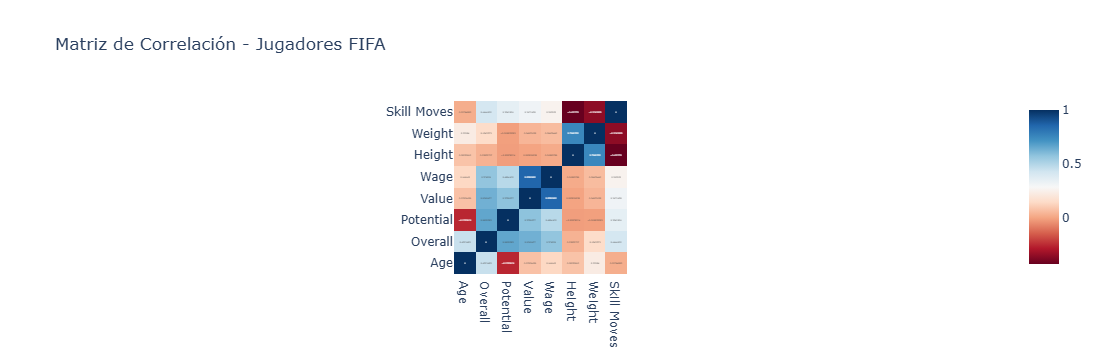

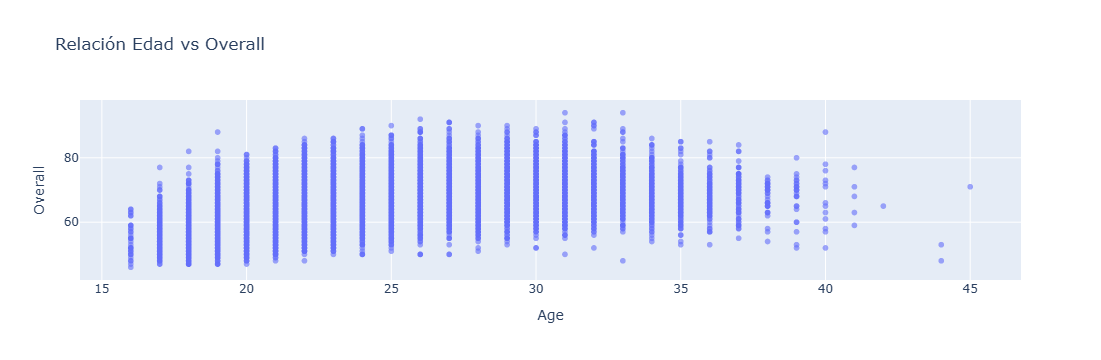

Correlación Edad-Overall: 0.452
Interpretación: valor cercano a 0 indica relación débil; negativo indica que al aumentar la edad, el overall tiende a bajar ligeramente.


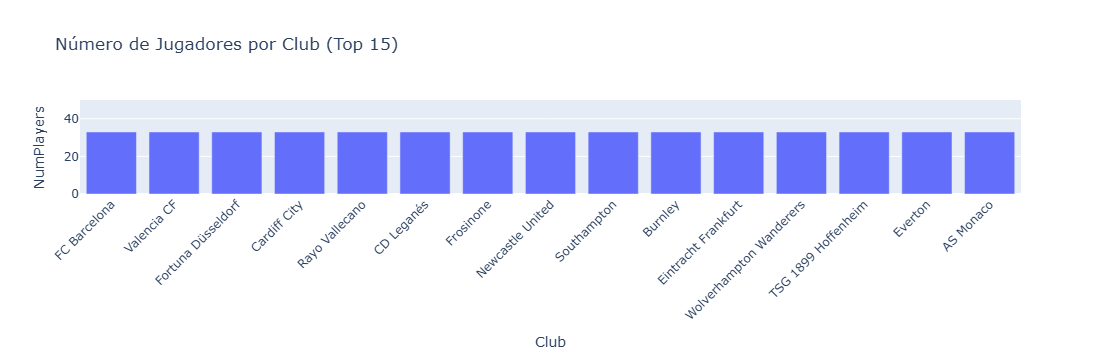

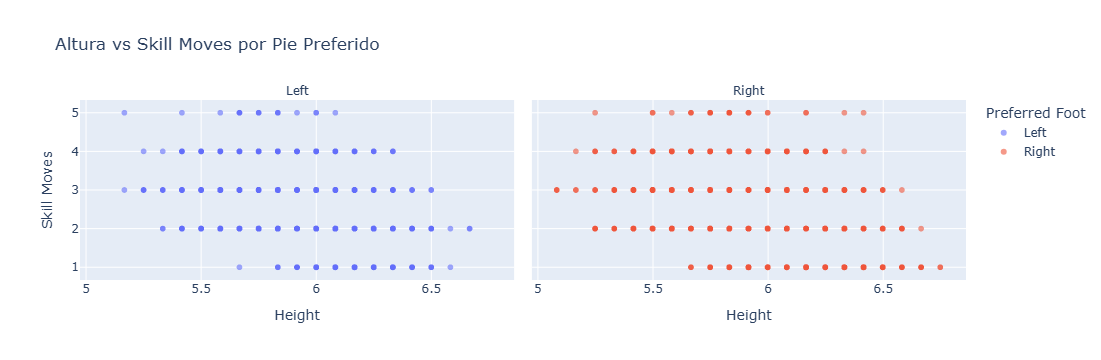

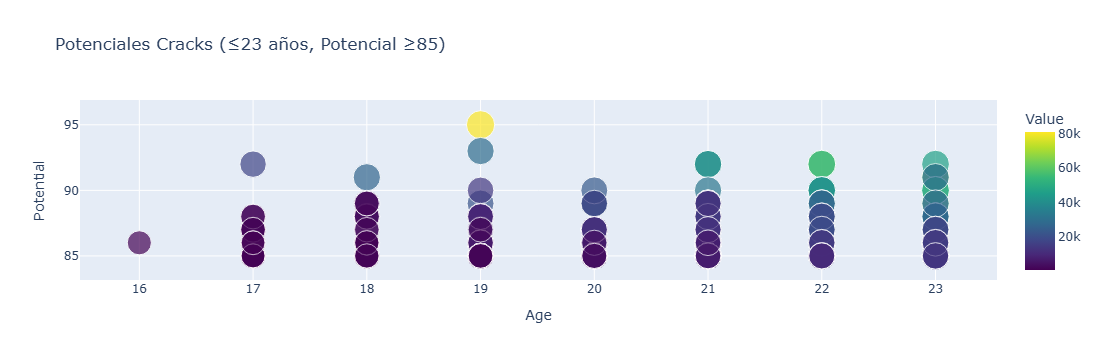

Se identificaron 244 potenciales cracks.
                    Name  Age  Overall  Potential                 Club
25             K. Mbappé   19       88         95  Paris Saint-Germain
55               L. Sané   22       86         92      Manchester City
56        Bernardo Silva   23       86         91      Manchester City
60           R. Sterling   23       86         89      Manchester City
77           M. Škriniar   23       85         92                Inter
78   S. Milinković-Savić   23       85         90                Lazio
79         Marco Asensio   22       85         92          Real Madrid
82            J. Kimmich   23       85         88    FC Bayern München
83                  Saúl   23       85         90      Atlético Madrid
110           D. Sánchez   22       84         88    Tottenham Hotspur


In [2]:
# ================================
# GRÁFICOS Y CORRELACIONES FIFA (con Plotly)
# ================================

import pandas as pd
import numpy as np
import plotly.express as px

# Leer archivo
df = pd.read_csv('fifa_eda.csv')

# Conversión mínima a numéricas para métricas/colores
for col in ['Value', 'Wage', 'Release Clause']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(r'[^0-9.]', '', regex=True), errors='coerce')

# ================================
# ELEMENTO 1: Matriz de correlación (heatmap)
# ================================
num_cols = ['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Height', 'Weight', 'Skill Moves']
num_cols = [c for c in num_cols if c in df.columns]
corr = df[num_cols].corr()
fig1 = px.imshow(corr, text_auto=True, color_continuous_scale='RdBu', origin='lower',
                 title='Matriz de Correlación - Jugadores FIFA')
fig1.show()

# ================================
# ELEMENTO 2: Relación Edad vs Overall
# ================================
fig2 = px.scatter(df, x='Age', y='Overall', opacity=0.6, title='Relación Edad vs Overall')
fig2.show()

corr_age_overall = df['Age'].corr(df['Overall'])
print(f"Correlación Edad-Overall: {corr_age_overall:.3f}")
print("Interpretación: valor cercano a 0 indica relación débil; negativo indica que al aumentar la edad, el overall tiende a bajar ligeramente.")

# ================================
# ELEMENTO 3: Barras por club (Top 15)
# ================================
club_counts = df['Club'].value_counts().head(15).reset_index()
club_counts.columns = ['Club', 'NumPlayers']
fig3 = px.bar(club_counts, x='Club', y='NumPlayers', title='Número de Jugadores por Club (Top 15)')
fig3.update_layout(xaxis_tickangle=-45)
fig3.update_yaxes(range=[0, 50])
fig3.show()

# ================================
# ELEMENTO 4: Multipanel Altura vs Skill Moves (zurdo vs derecho)
# ================================
if 'Preferred Foot' in df.columns:
    subset = df[df['Preferred Foot'].isin(['Left', 'Right'])]
    fig4 = px.scatter(subset, x='Height', y='Skill Moves', facet_col='Preferred Foot',
                      color='Preferred Foot', opacity=0.6,
                      title='Altura vs Skill Moves por Pie Preferido')
    fig4.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
    fig4.show()

# ================================
# ELEMENTO 5: Potenciales cracks (≤23 años, Potencial ≥85)
# ================================
mask = (df['Age'] <= 23) & (df['Potential'] >= 85)
pot_cracks = df[mask].copy()
fig5 = px.scatter(pot_cracks, x='Age', y='Potential',
                  size='Overall', color='Value', hover_name='Name',
                  color_continuous_scale='Viridis',
                  title='Potenciales Cracks (≤23 años, Potencial ≥85)')
fig5.show()

print(f"Se identificaron {len(pot_cracks)} potenciales cracks.")
if not pot_cracks.empty:
    print(pot_cracks[['Name', 'Age', 'Overall', 'Potential', 'Club']].head(10))